# LAB 5 - K-MEANS FOR FACE RECOGNITION

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2 ## import cv2
import numpy as np ## import numpy
import matplotlib.pyplot as plt ## import matplotlib pyplot
from sklearn.cluster import KMeans ## import KMeans cluster from sklearn
from scipy.spatial import distance ## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
## Reading the image plaksha_Faculty.jpg
faculty_img = cv2.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale
grey_faculty = cv2.cvtColor(faculty_img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
faculty_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faculty_rect = faculty_cascade.detectMultiScale(grey_faculty, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.6  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2   ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faculty_rect:
    cv2.rectangle(faculty_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(faculty_img, text, (x, max(10, y-10)), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
title = f"Number of faces detected: {len(faculty_rect)}"
cv2.imshow(title, faculty_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

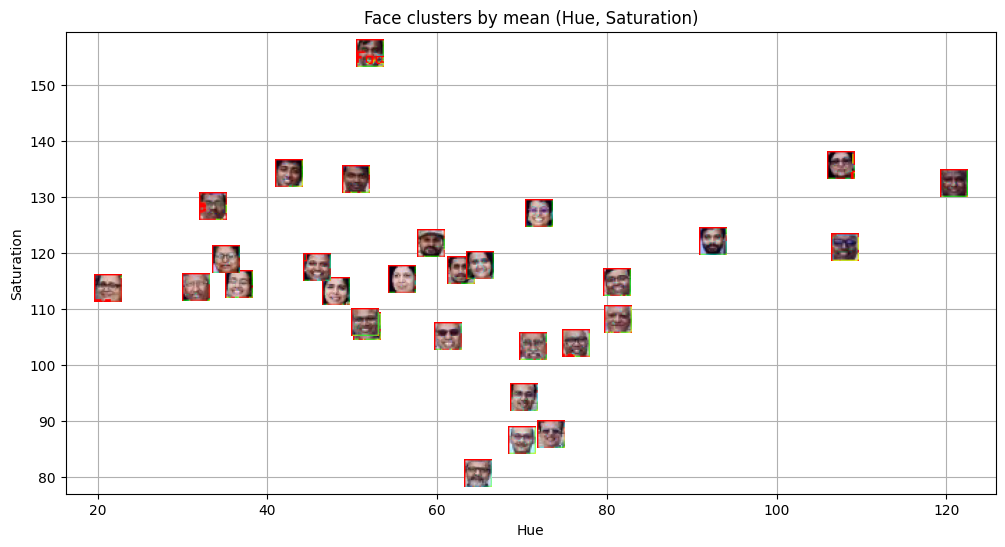

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(faculty_img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
faculty_face_imgs = []  # To store detected face images

for (x, y, w, h) in faculty_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    faculty_face_imgs.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faculty_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(faculty_face_imgs[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
## Put y label
## Put title
## Put grid
## show the plot

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Face clusters by mean (Hue, Saturation)')
plt.grid(True)
plt.show()

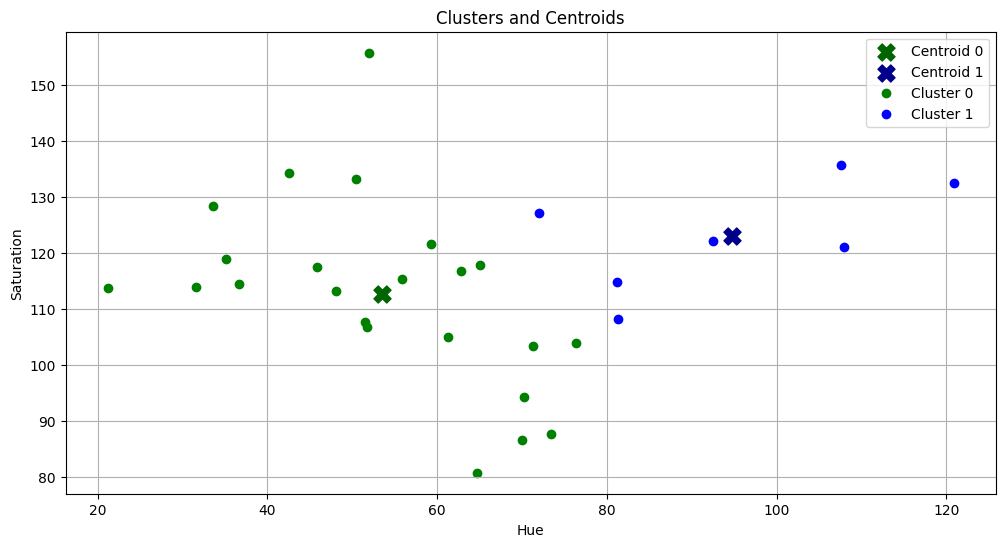

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faculty_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=150, c='darkgreen', label='Centroid 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=150, c='darkblue', label='Centroid 1')

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clusters and Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = faculty_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4, minSize=(25,25))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Template faces', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

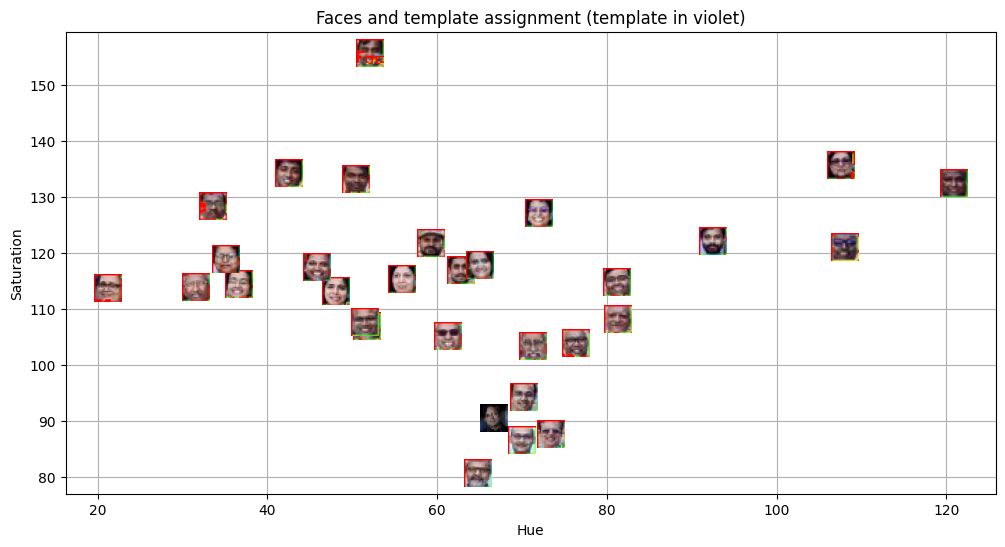

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:,:,0])
template_saturation = np.mean(template_hsv[:,:,1])

# Predict the cluster label for the template image and store it in template_label
template_label = template_label = int(kmeans.predict([[template_hue, template_saturation]])[0])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faculty_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(faculty_face_imgs[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Faces and template assignment (template in violet)')
plt.grid(True)
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10)
plt.show()

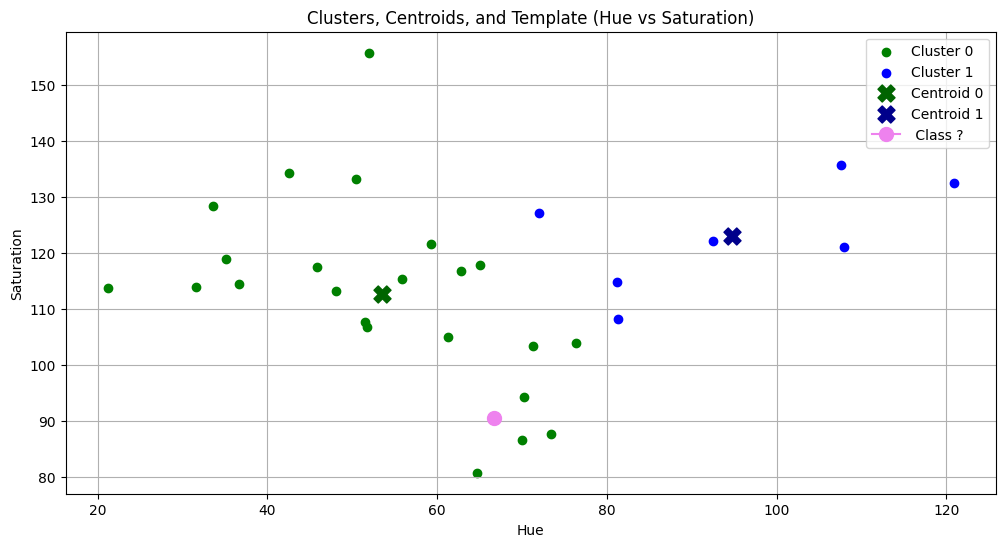

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faculty_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=150, c='darkgreen', label='Centroid 0')  ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=150, c='darkblue', label='Centroid 1')   ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clusters, Centroids, and Template (Hue vs Saturation)')
plt.legend()
plt.grid(True)
plt.show()

                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

The most common distance metric is the Euclidean distance, which represents the shortest path between points. The Mahalanobis distance accounts for data distribution and variance. Manhattan distance, Chebyshev distance, Minkowski distance and Cosine distance are also used. 

#### 2. What are some real-world applications of distance-based classification algorithms? 

-Spam filtering for emails

-Face recognition

-Image classification

-Fraud detection

-Creditworthiness assessment

-Disease classification

#### 3. Explain various distance metrics. 

- Euclidean Distance - straight-line distance between two vectors, does not account for data distribution.
- Mahalanobis Distance- measures how many standard deviations away a point is from a distribution's mean. Scale-invariant and sensitive to correlations.
- Manhattan Distance - sum of absolute differences between coordinates, better than Euclidean in high-dimensional spaces.
- Chebyshev Distance - largest difference along any coordinate dimension.
- Cosine Distance - angle between vectors instead of magnitude.
- Hamming Distance - counts no. of positions where two strings or bits differ.

#### 4. What is the role of cross validation in model performance? 

Cross-validation is essential for evaluating the performance of a model on unseen data. The dataset is split into training, validation and test sets, with which it can be ensured that the model is not simply memorising the training data. In N-fold cross-validation, the training/ validation data is randomly broken into N segments (often 10) to validate the model multiple times for optimising parameters, to ensure minimum validation error before the final tests. 

#### 5. Explain variance and bias in terms of KNN? 

In the KNN algorithm,the choice of K directly dictates the balance between the bias and variance (bias-variance trade-off). A low value of K means that the model is highly sensitive to local noise & individual nbrs, which causes high variance. A high value of K, meanwhile, means the model may simply predict the majority class for most inputs, which increases bias (while reducing variance). An idea model is one where bias and variance are both low, but the threshold values chosen depend on the context of the problem. 